In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset indirilmesi

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Bu sayılar: her bir resmin 32x32 boyutunda bir kare olduğunu göstermektedir. Renkli 3 kanal mevcuttur. Red Green Blue!

train verileri içerisinde ilk 3 fotoğraf ne diye bakmak istiyorsak:)

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

bu sayılar veri setinde 6 numarasına uygun hangi resim ise ilk resim onu gösteriyor. sonraki iki resimde 9. sıradaki resimmiş demektir bu. array kelimesinden sonra iki tane kare parantez olduğunu görebiliyoruz, bu ikiboyutlu bir array demek.

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

#göründüğü gibi tek paranteze düştü bu bir boyutlu bir array demektir.

In [8]:
resim_sınıflari = ["airplane", "automobile","bird","cat","deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(X[index])
    plt.xlabel(resim_sınıflari[y[index]])

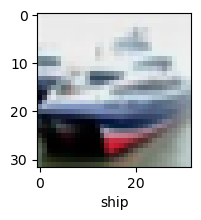

In [10]:
plot_sample(X_test, y_test, 1)

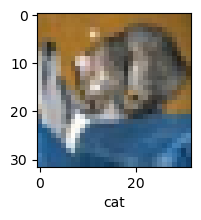

In [11]:
plot_sample(X_test, y_test, 0)

NORMALİZASYON

In [12]:
X_train = X_train/255
X_test = X_test/255

Verileri normalize etmek gerek yoksa CNN algoritması yanlış sonuç verebilir. 3 reng kanali RGB 0-255 pixel arasındadır. Basitce pixel değerini 255e bölelim 0-1 arasına çekmek için

CNN ALGORİTMASI TASARIMI

In [13]:
deep_learning_model = tf.keras.Sequential([
    #ilk bölümde evrişim katmanı burada fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz.
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3),
                           activation = 'relu',
                           input_shape = (32,32,3)),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    
    #overfittingi engelliyor ve hızlı çalışıyor.
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
     #ikinci bölümde Articial network katmanları kuruyoruz.
    tf.keras.layers.Flatten(), #cnn ve ann arasındaki bağlantıyı yapıyor.
    tf.keras.layers.Dense(64, 
                          activation = 'relu'), #hiddenlayer 64 nerön
    tf.keras.layers.Dense(10, 
                          activation = 'softmax') #outputlayer 10 nerön çünkü 10 sınıf olduğundan 10 output oluyor
])

In [14]:
deep_learning_model.compile(optimizer = 'adam',
                            loss = 'SparseCategoricalCrossentropy',
                            metrics = ['accuracy'])
                            

Modeli eğitmeye başlayalım.

In [15]:
deep_learning_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4753 - accuracy: 0.4681
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1101 - accuracy: 0.6112
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9768 - accuracy: 0.6604
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8899 - accuracy: 0.6913
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8307 - accuracy: 0.7135


In [16]:
deep_learning_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9446 - accuracy: 0.6807


[0.9445817470550537, 0.6807000041007996]

67% test verisiyle doğruluk, 70% ile train verisiyle doğruluk aldı.